
## DATA SCIENCE INTERNSHIP LET'S GROW MORE

## INTERMEDIATE TASK

## Task 2:Prediction Using Decision Tree Algorithm

Dataset Link:https://bit.ly/3kXTdox

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [61]:
#Read the dataset
df=pd.read_csv("iris.data")

In [62]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [63]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [64]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [65]:
df.duplicated().sum()

3

In [66]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

In [67]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.103784,0.871283,0.816971
sepal_width,-0.103784,1.000000,-0.415218,-0.350733
petal_length,0.871283,-0.415218,1.000000,0.962314
petal_width,0.816971,-0.350733,0.962314,1.000000


In [68]:
df.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Species, dtype: int64

In [69]:
import seaborn as sns
%matplotlib inline

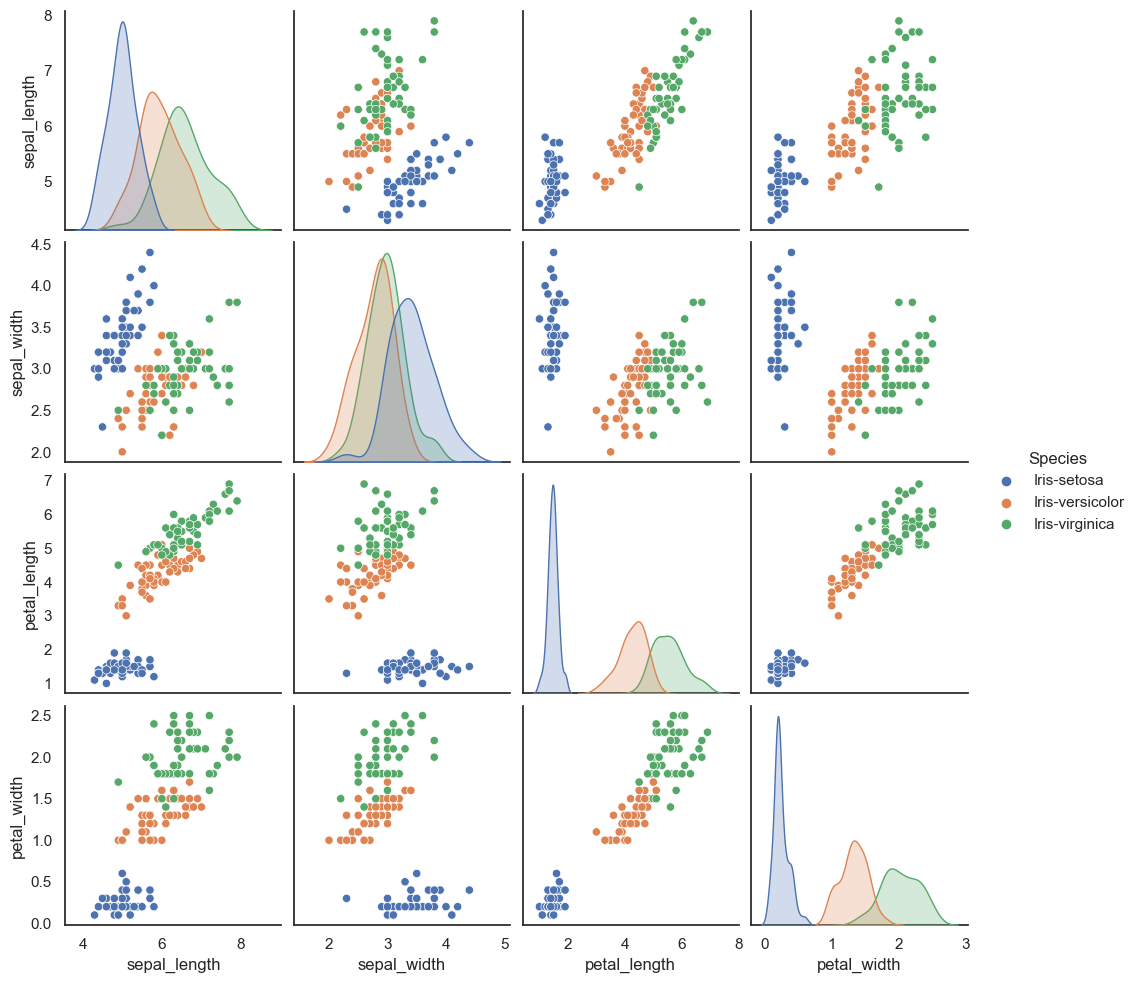

In [70]:
# Finding the relation between 2 features by vizualization
sns.pairplot(data=df,vars=['sepal_length','sepal_width','petal_length','petal_width'],hue='Species')

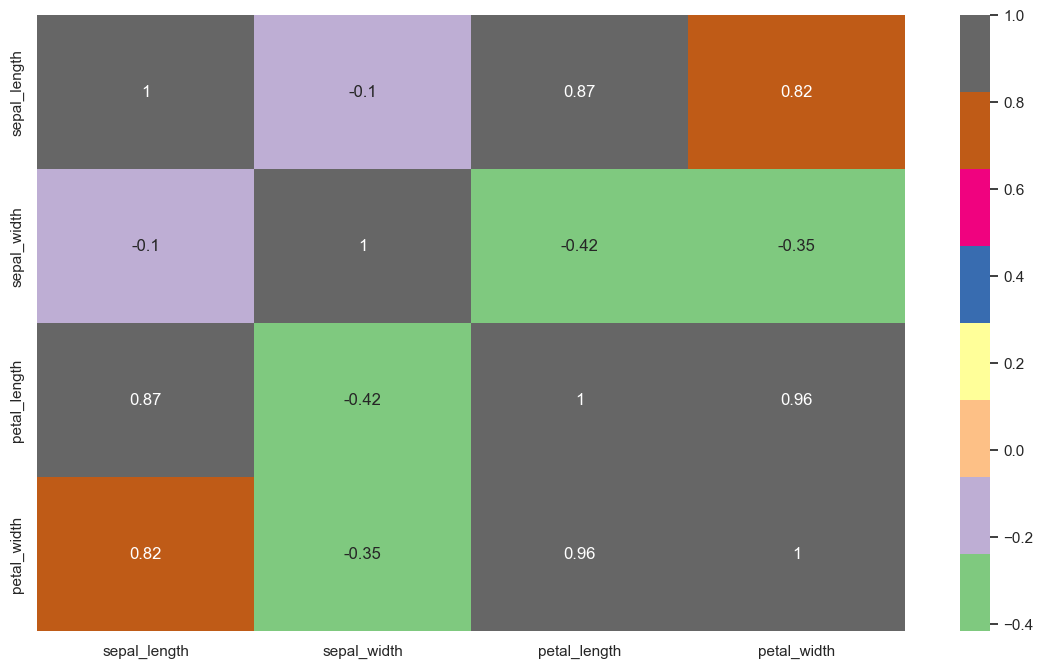

In [71]:
# Finding the correlation
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Accent", fmt='.2g')#.2g is the decimal values

In [72]:
fig=go.Figure()
fig.add_trace(go.Box(y=df.sepal_length,name='Sepal_Length'))
fig.add_trace(go.Box(y=df.sepal_width,name='Sepal_Width'))
fig.add_trace(go.Box(y=df.petal_length,name='Petal_Length'))
fig.add_trace(go.Box(y=df.petal_width,name='Petal_Width'))

## we found outlier in sepal_width

In [73]:
#As sepalwidth contains outier by using some IQR treatment lets remove it
df['sepal_width'].describe()

count    149.000000
mean       3.051007
std        0.433499
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

In [74]:
q3 = df["sepal_width"].quantile(0.75)  
q1 = df["sepal_width"].quantile(0.25)
print(q3)
print(q1)

3.3
2.8


In [75]:
IQR = q3 - q1
print(IQR)

0.5


In [76]:
lower_limit = q1 - (IQR * 1.5)
print(lower_limit)

2.05


In [77]:
upper_limit = q3 + (IQR * 1.5)
print(upper_limit)

4.05


In [78]:
df_outliers = np.where(df["sepal_width"] > upper_limit, True,
                np.where(df["sepal_width"] < lower_limit, True, False))

In [79]:
df_without_outliers = df.loc[~(df_outliers)]

<AxesSubplot:ylabel='sepal_width'>

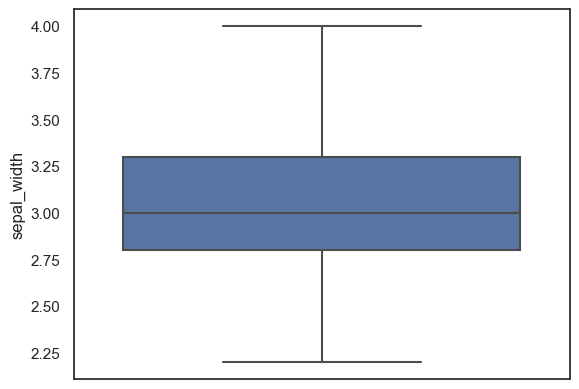

In [80]:
#Now the outlier is removed
a=sns.boxplot( y='sepal_width', data=df_without_outliers)
a

## Dataset for model

In [81]:
X=df.drop("Species",axis=1)

In [82]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
144,6.7,3.0,5.2,2.3
145,6.3,2.5,5.0,1.9
146,6.5,3.0,5.2,2.0
147,6.2,3.4,5.4,2.3


In [83]:
y=df['Species']

## Model Building

In [84]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

In [86]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [87]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [88]:
model.score(X_train,y_train)

1.0

[Text(0.375, 0.9, 'X[2] <= 2.45\ngini = 0.664\nsamples = 99\nvalue = [35, 29, 35]'),
 Text(0.25, 0.7, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.5, 0.7, 'X[3] <= 1.75\ngini = 0.496\nsamples = 64\nvalue = [0, 29, 35]'),
 Text(0.25, 0.5, 'X[2] <= 5.3\ngini = 0.124\nsamples = 30\nvalue = [0, 28, 2]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.5, 'X[2] <= 4.85\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(0.625, 0.3, 'X[1] <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]')]

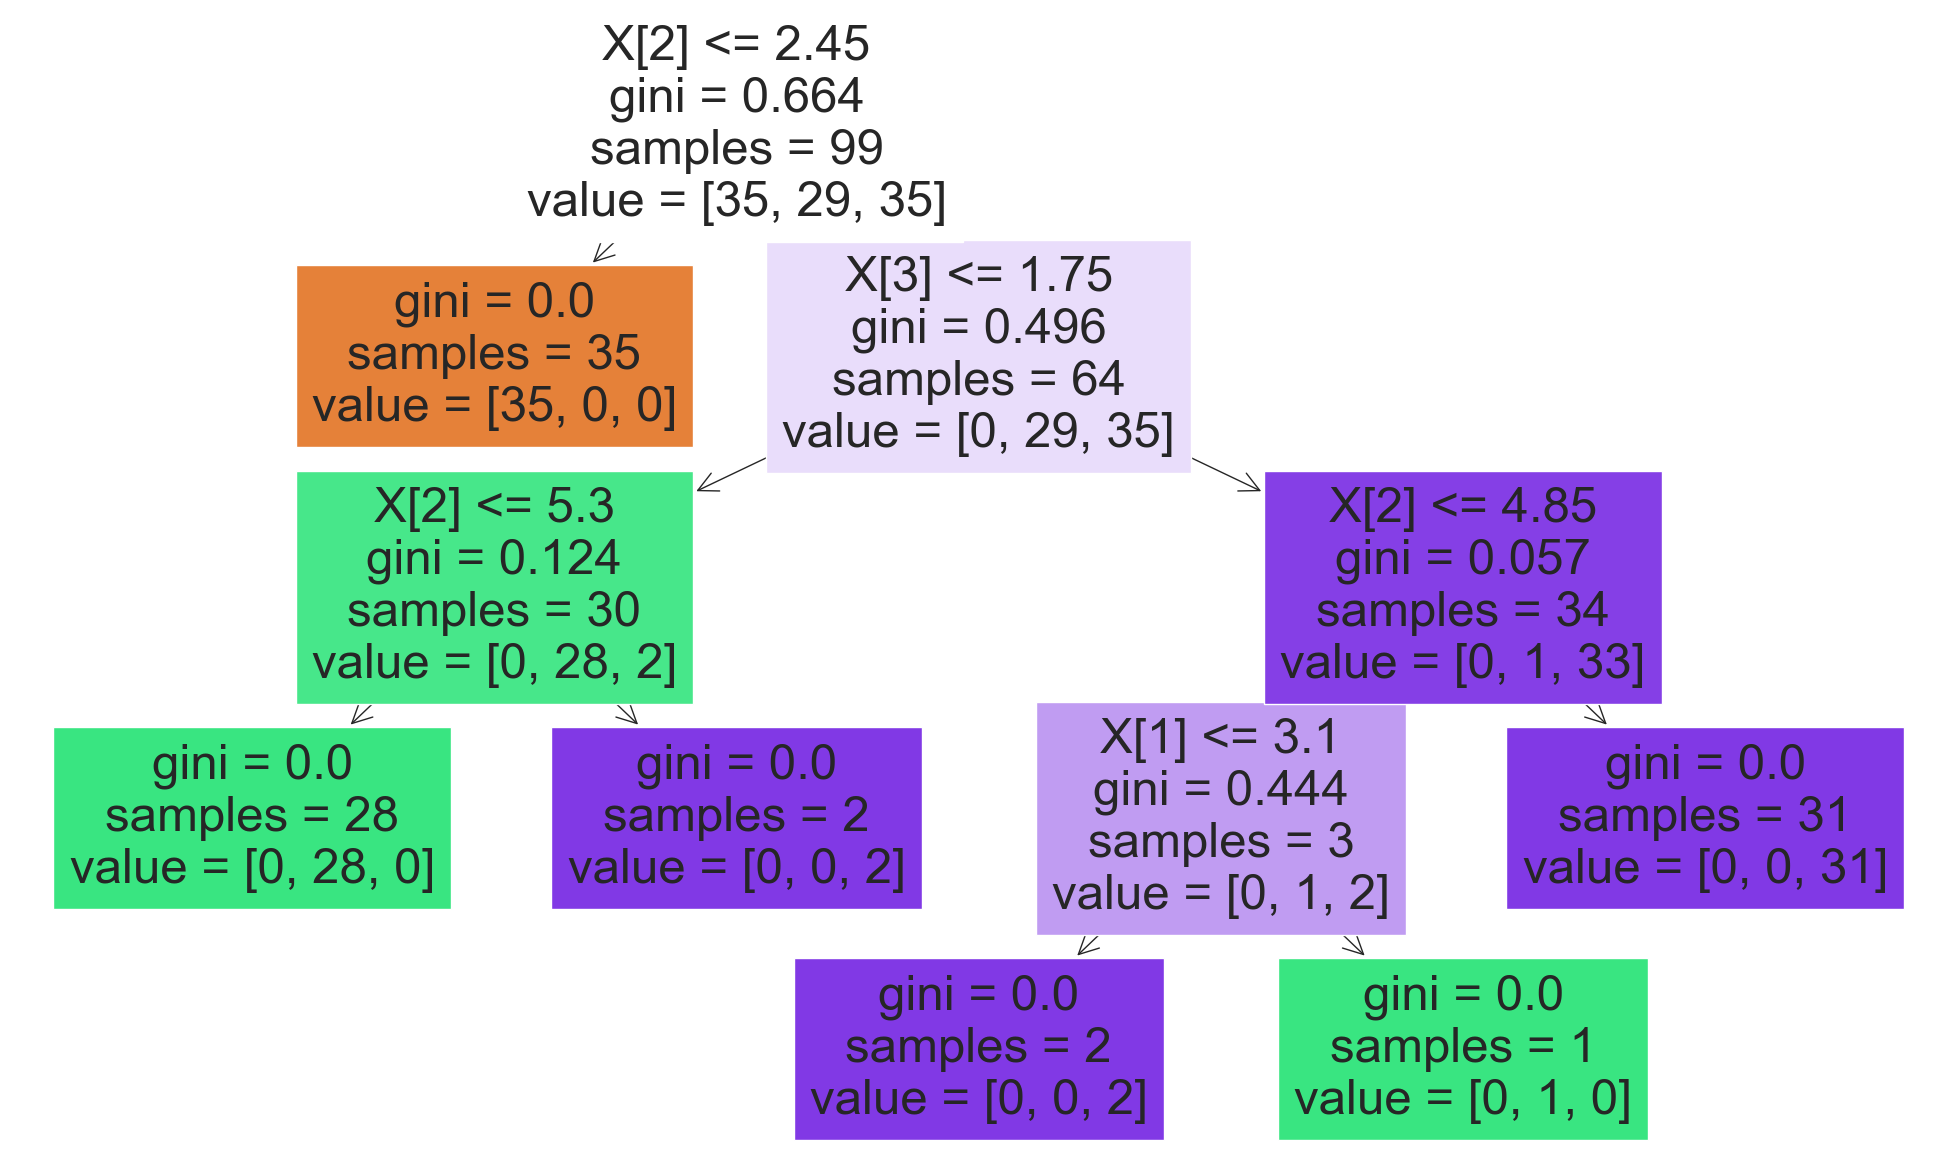

In [89]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model,filled=True)

In [90]:
fig.savefig("Decision_Tree.png")

In [91]:
y_predict=model.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_test,y_predict)
print(cm)
accuracy_score(y_test,y_predict)

[[14  0  0]
 [ 0 21  0]
 [ 0  3 12]]


0.94

In [93]:
import pickle
filename = 'decision_tree.pkl'
pickle.dump(model, open(filename, 'wb'))

In [94]:
loaded_dt1_model=pickle.load(open(filename, 'rb'))


In [95]:
p=loaded_dt1_model.predict([[1,5.1,3.5,1.4]])
p

array(['Iris-versicolor'], dtype=object)

In [96]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_predict))
print(metrics.confusion_matrix(y_test,y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.88      1.00      0.93        21
 Iris-virginica       1.00      0.80      0.89        15

       accuracy                           0.94        50
      macro avg       0.96      0.93      0.94        50
   weighted avg       0.95      0.94      0.94        50

[[14  0  0]
 [ 0 21  0]
 [ 0  3 12]]


## Parameter Tunning

In [97]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,8,1),
    'min_samples_split': range(2,8,1),
    'splitter' : ['best', 'random']
    
}

In [98]:
from sklearn.model_selection import GridSearchCV
grid_searh=GridSearchCV(estimator=model,param_grid=grid_param,cv=3,verbose=1)

In [99]:
grid_searh.fit(X_train,y_train)

Fitting 3 folds for each of 1344 candidates, totalling 4032 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 8),
                         'splitter': ['best', 'random']},
             verbose=1)

In [100]:
grid_searh.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 7,
 'splitter': 'random'}

In [101]:
model_with_best_params=DecisionTreeClassifier(criterion= 'gini',max_depth= 6,min_samples_leaf= 4,min_samples_split= 6,splitter='random')
model_with_best_params.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=6,
                       splitter='random')

[Text(0.5, 0.9285714285714286, 'X[3] <= 1.255\ngini = 0.664\nsamples = 99\nvalue = [35, 29, 35]'),
 Text(0.3, 0.7857142857142857, 'X[2] <= 3.288\ngini = 0.303\nsamples = 43\nvalue = [35, 8, 0]'),
 Text(0.2, 0.6428571428571429, 'X[3] <= 0.221\ngini = 0.054\nsamples = 36\nvalue = [35, 1, 0]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 21\nvalue = [21, 0, 0]'),
 Text(0.3, 0.5, 'X[1] <= 3.399\ngini = 0.124\nsamples = 15\nvalue = [14, 1, 0]'),
 Text(0.2, 0.35714285714285715, 'gini = 0.375\nsamples = 4\nvalue = [3, 1, 0]'),
 Text(0.4, 0.35714285714285715, 'gini = 0.0\nsamples = 11\nvalue = [11, 0, 0]'),
 Text(0.4, 0.6428571428571429, 'gini = 0.0\nsamples = 7\nvalue = [0, 7, 0]'),
 Text(0.7, 0.7857142857142857, 'X[3] <= 1.388\ngini = 0.469\nsamples = 56\nvalue = [0, 21, 35]'),
 Text(0.6, 0.6428571428571429, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0]'),
 Text(0.8, 0.6428571428571429, 'X[1] <= 3.251\ngini = 0.395\nsamples = 48\nvalue = [0, 13, 35]'),
 Text(0.7, 0.5, 'X[2] <= 5.446\ngini = 0.427\n

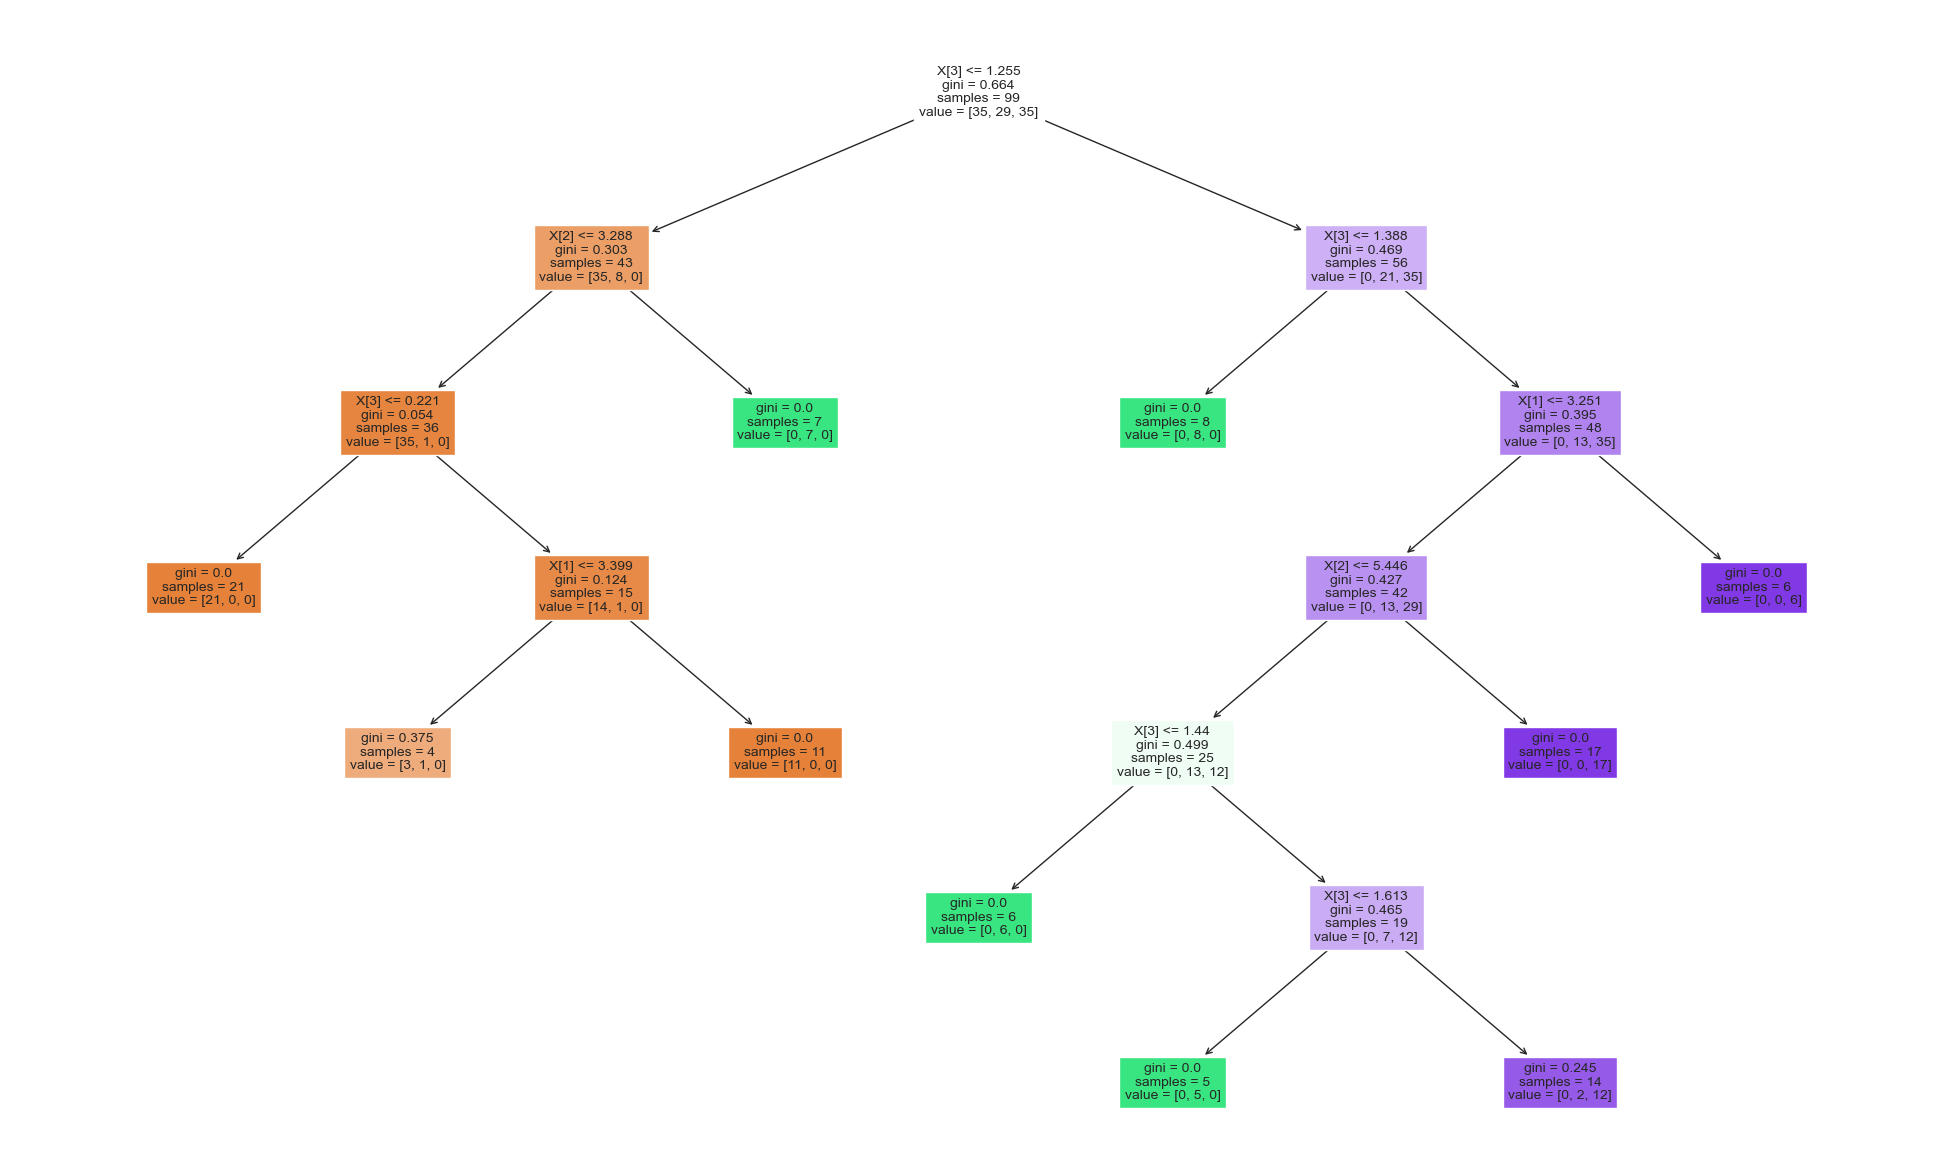

In [102]:
from sklearn import tree
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_params,filled=True,fontsize=10)

In [103]:
y_prediction2=model_with_best_params.predict(X_test)

In [104]:
accuracy_score(y_test,y_prediction2)

0.92